# WA Languages Diversity 

## We will start off by creating different dfs
1. Counties
    - Has all of the county to district information
2. Ancentory and language spoken at home
    - Has the ancestory and language spoken at home for each county
3. School enrollment per county
    - Enrollment by age and educational attainment by county

In [2]:
import pandas as pd

/tmp/ipykernel_1238/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
counties = pd.read_csv("data/Counties.csv", header=2)
counties = counties.loc[counties["State Postal Code"] == "WA"]
ppe = pd.read_csv('data/SchoolDistrictPPEAverages.csv')

In [4]:
def clean(series):
    '''
    A function to clean columns in a dataframe to all lowercase strings.
    Returns a cleaned list of the given column.
    '''
    cleaned = []
    for row in series:
        cleaned.append(str(row).lower())
    return cleaned

In [5]:
ppe['district_name'] = clean(ppe['Districtname'])
counties['district_name'] = clean(counties['School District Name'])

In [6]:
merged = ppe.merge(counties, right_on="district_name", left_on="district_name")
merged

,Districtname,PPE,district_name,State Postal Code,State FIPS,District ID Number,School District Name,County Names,County FIPS
0,Aberdeen School District,6191.511824,aberdeen school district,WA,53,30,Aberdeen School District,Grays Harbor County,27
1,Adna School District,14105.516930,adna school district,WA,53,60,Adna School District,Lewis County,41
2,Almira School District,8644.918222,almira school district,WA,53,90,Almira School District,Grant County,25
3,Almira School District,8644.918222,almira school district,WA,53,90,Almira School District,Lincoln County,43
4,Anacortes School District,9780.410885,anacortes school district,WA,53,150,Anacortes School District,Skagit County,57
...,...,...,...,...,...,...,...,...,...
353,Wishram School District,7323.477110,wishram school district,WA,53,10020,Wishram School District,Klickitat County,39
354,Woodland School District,9636.873132,woodland school district,WA,53,10050,Woodland School District,Clark County,11
355,Woodland School District,9636.873132,woodland school district,WA,53,10050,Woodland School District,Cowlitz County,15
356,Yakima School District,9331.332774,yakima school district,WA,53,10110,Yakima School District,Yakima County,77


In [7]:
languages = pd.read_csv("data/S1601LanguagesSpokenAtHome.csv")
languages.set_index('Label (Grouping)', inplace=True)
languages = languages.transpose()
languages['temp_index'] = languages.index
regex_pattern = r"^[\w,\s]+\!\![\w,\s]+\!\![\w,\s]+$"
languages = languages.loc[languages['temp_index'].str.contains(regex_pattern)]
languages.insert(0, "County", "")       
languages.insert(1, "Ratio", "")

for row in languages['temp_index']:
    terms = row.split("!!")
    terms[0] = terms[0].split(",")[0]
    languages.loc[row, ['County']] = terms[0]
    languages.loc[row, ['Ratio']] = terms[1]

languages.rename_axis(None, axis=1, inplace=True)
languages.set_index(['County', 'Ratio'], inplace=True)
languages.drop(columns=['temp_index'], inplace=True, axis=1)


In [8]:
ancestry = pd.read_csv("data/DP02AncestryLanguagesSpokenAtHome.csv")
ancestry.set_index('Label (Grouping)', inplace=True)
ancestry = ancestry.transpose()
ancestry['temp_index'] = ancestry.index
regex_pattern = r"^[\w,\s]+\!\![\w,\s]+$"
ancestry = ancestry.loc[ancestry['temp_index'].str.contains(regex_pattern)]
ancestry.insert(0, "County", "")
ancestry.insert(1, "Ratio", "")

for row in ancestry['temp_index']:
    terms = row.split("!!")
    terms[0] = terms[0].split(",")[0]
    ancestry.loc[row, ['County']] = terms[0]
    ancestry.loc[row, ['Ratio']] = terms[1]

ancestry.rename_axis(None, axis=1, inplace=True)
ancestry.set_index(['County', 'Ratio'], inplace=True)
ancestry.drop(columns=['temp_index'], inplace=True, axis=1)
ancestry.head(30)

ancestry[ancestry.filter(like='With computers').columns]
ancestry


HOUSEHOLDS BY TYPE     Total households  \
County         Ratio                                              
Washington     Estimate                NaN            2,979,272   
               Percent                 NaN            2,979,272   
Adams County   Estimate                NaN                6,304   
               Percent                 NaN                6,304   
Asotin County  Estimate                NaN                9,499   
...                                    ...                  ...   
Whatcom County Percent                 NaN               91,171   
Whitman County Estimate                NaN               17,963   
               Percent                 NaN               17,963   
Yakima County  Estimate                NaN               85,558   
               Percent                 NaN               85,558   

                                Married-couple household  \
County         Ratio                                       
Washington     Estimate                        1,482,230   
               Percent                             49.8%   
Adams County   Estimate                            3,509   
               Percent                             55.7%   
Asotin County  Estimate                            4,180   
...                                                  ...   
Whatcom County Percent                             48.0%   
Whitman County Estimate                            7,021   
               Percent                             39.1%   
Yakima County  Estimate                           42,367   
               Percent                             49.5%   

                                    With children of the householder under 18 years  \
County         Ratio                                                                  
Washington     Estimate                                            588,901            
               Percent                                               19.8%            
Adams County   Estimate                                              1,679            
               Percent                                               26.6%            
Asotin County  Estimate                                              1,264            
...                                                                    ...            
Whatcom County Percent                                               17.8%            
Whitman County Estimate                                              2,708            
               Percent                                               15.1%            
Yakima County  Estimate                                             17,764            
               Percent                                               20.8%            

                                Cohabiting couple household  \
County         Ratio                                          
Washington     Estimate                             251,755   
               Percent                                 8.5%   
Adams County   Estimate                                 500   
               Percent                                 7.9%   
Asotin County  Estimate                                 876   
...                                                     ...   
Whatcom County Percent                                 9.2%   
Whitman County Estimate                               1,532   
               Percent                                 8.5%   
Yakima County  Estimate                               7,859   
               Percent                                 9.2%   

                                    With children of the householder under 18 years  \
County         Ratio                                                                  
Washington     Estimate                                             75,364            
               Percent                                                2.5%            
Adams County   Estimate                                                

In [9]:
enrollment = pd.read_csv("data/S1401SchoolEnrollment.csv")
enrollment.set_index('Label (Grouping)', inplace=True)
enrollment = enrollment.transpose()
enrollment['temp_index'] = enrollment.index
regex_pattern = r"^[\w,\s]+\!\![\w,\s]+\!\![\w,\s]+$"
enrollment = enrollment.loc[enrollment['temp_index'].str.contains(regex_pattern)]
enrollment.insert(0, "County", "")
enrollment.insert(1, "Ratio", "")

for row in enrollment['temp_index']:
    terms = row.split("!!")
    terms[0] = terms[0].split(",")[0]
    enrollment.loc[row, ['County']] = terms[0]
    enrollment.loc[row, ['Ratio']] = terms[1]

enrollment.rename_axis(None, axis=1, inplace=True)
enrollment.set_index(['County', 'Ratio'], inplace=True)
enrollment.drop(columns=['temp_index'], inplace=True, axis=1)
enrollment.head(30)

Population 3 years and over enrolled in school  \
County        Ratio                                                                      
Washington    Total                                                          1,766,556   
              Percent                                                              (X)   
              In public school                                                     (X)   
              Percent in public school                                           84.0%   
              In private school                                                    (X)   
              Percent in private school                                          16.0%   
Adams County  Total                                                              6,133   
              Percent                                                              (X)   
              In public school                                                     (X)   
              Percent in public school                                           95.3%   
              In private school                                                    (X)   
              Percent in private school                                           4.7%   
Asotin County Total                                                              4,221   
              Percent                                                              (X)   
              In public school                                                     (X)   
              Percent in public school                                           88.2%   
              In private school                                                    (X)   
              Percent in private school                                          11.8%   
Benton County Total                                                             53,279   
              Percent                                                              (X)   
              In public school                                                     (X)   
              Percent in public school                                           87.5%   
              In private school                                                    (X)   
              Percent in private school                                          12.5%   
Chelan County Total                                                             17,955   
              Percent                                                              (X)   
              In public school                                                     (X)   
              Percent in public school                                           87.9%   
              In private school                                                    (X)   
              Percent in private school                                          12.1%   

                                            Nursery school, preschool  \
County        Ratio                                                     
Washington    Total                                           107,091   
              Percent                                            6.1%   
              In public school                                 51,222   
              Percent in public school                          47.8%   
              In private school                                55,869   
              Percent in private school                         52.2%   
Adams County  Total                                               238   
              Percent                                            3.9%   
              In public school                                    218   
              Percent in public school                          91.6%   
              In private school                                    20   
              Percent in private school                          8.4%   
Asotin County Total                                               387   
              Percent                                           

In [10]:
education = pd.read_csv('data/S1501EducationByRace.csv')
education.set_index('Label (Grouping)', inplace=True)
education = education.transpose()
education['temp_index'] = education.index
regex_pattern = r"^[\w,\s]+\!\![\w,\s]+\!\![\w,\s]+$"
education = education.loc[education['temp_index'].str.contains(regex_pattern)]
education.insert(0, "County", "")
education.insert(1, "Ratio", "")

for row in education['temp_index']:
    terms = row.split("!!")
    terms[0] = terms[0].split(",")[0]
    education.loc[row, ['County']] = terms[0]
    education.loc[row, ['Ratio']] = terms[1]

education.rename_axis(None, axis=1, inplace=True)
education.set_index(['County', 'Ratio'], inplace=True)
education.drop(columns=['temp_index'], inplace=True, axis=1)
education.head(30)

education

AGE BY EDUCATIONAL ATTAINMENT  \
County        Ratio                                          
Washington    Total                                    NaN   
              Percent                                  NaN   
              Male                                     NaN   
              Percent Male                             NaN   
              Female                                   NaN   
...                                                    ...   
Yakima County Percent                                  NaN   
              Male                                     NaN   
              Percent Male                             NaN   
              Female                                   NaN   
              Percent Female                           NaN   

                                 Population 18 to 24 years  \
County        Ratio                                          
Washington    Total                                671,550   
              Percent                                  (X)   
              Male                                 351,705   
              Percent Male                             (X)   
              Female                               319,845   
...                                                    ...   
Yakima County Percent                                  (X)   
              Male                                  12,769   
              Percent Male                             (X)   
              Female                                12,171   
              Percent Female                           (X)   

                                     Less than high school graduate  \
County        Ratio                                                   
Washington    Total                                          85,472   
              Percent                                         12.7%   
              Male                                           50,429   
              Percent Male                                    14.3%   
              Female                                         35,043   
...                                                             ...   
Yakima County Percent                                         25.4%   
              Male                                            3,853   
              Percent Male                                    30.2%   
              Female                                          2,482   
              Percent Female                                  20.4%   

                                     High school graduate (includes equivalency)  \
County        Ratio                                                                
Washington    Total                                                     244,136    
              Percent                                                     36.4%    
              Male                                                      138,950    
              Percent Male                                                39.5%    
              Female                                                    105,186    
...                                                                         ...    
Yakima County Percent                                                     43.1%    
              Male                                                        6,173    
              Percent Male                                                48.3%    
              Female                                                      4,573    
              Percent Female                                              37.6%    

                                     Some college or associate's degree  \
County        Ratio                                                       
Washington    Total                                             235,801   
              Percent                                             35.1%   
              Male                                              117,715   
              Percent M

# Research Questions:
1. How does language diversity in each Washington county affect their educational attainment outcomes? S1501, S1401 (2)

2. How do school district budgets and spending affect spoken language diversity in Washington counties? DOWNLOADED ONLINE (2)

3. To what extent do Washington residents continue to practice their ancestral culture through language? DP02 (1)


In [11]:
# 1. how does language diversity in each Washington county affect their educational attainment outcomes?
# make a df that has the different counties as the index and the language diversity as columns
languages = languages.loc[(languages.index.get_level_values("County"), "Percent"), :]
columns = []
columns.append(languages.filter(like="Speak a language other than English").columns[0])
columns.append(languages.filter(like="Spanish").columns[0])
columns.append(languages.filter(like="Other Indo-European languages").columns[0])
columns.append(languages.filter(like="Asian and Pacific Island languages").columns[0])
columns.append(languages.filter(like="Other languages").columns[0])


enrollment = enrollment.loc[(enrollment.index.get_level_values("County"), "Percent"), :]
columns2 = []
columns2.append(enrollment.filter(like="College, undergraduate").columns[0])
columns2.append(enrollment.filter(like="Graduate, professional school").columns[0])

enrollment = enrollment.droplevel(1)[columns2]
languages = languages.droplevel(1)[columns]

q1 = pd.merge(enrollment, languages, on=['County'])
q1

,"College, undergraduate","Graduate, professional school",Speak a language other than English,Spanish,Other Indo-European languages,Asian and Pacific Island languages,Other languages
County,,,,,,,
Washington,20.6%,5.3%,20.5%,8.7%,4.2%,6.3%,1.4%
Adams County,8.7%,0.8%,51.1%,48.9%,0.8%,0.5%,0.9%
Asotin County,13.7%,1.0%,4.4%,2.5%,0.5%,1.3%,0.1%
Benton County,15.1%,3.6%,21.4%,16.3%,2.3%,1.9%,0.9%
Chelan County,17.3%,3.3%,26.1%,24.1%,1.3%,0.7%,0.0%
Clallam County,16.7%,3.8%,5.7%,3.1%,1.4%,0.8%,0.4%
Clark County,16.7%,3.6%,15.7%,6.3%,5.5%,3.4%,0.6%
Columbia County,23.1%,5.1%,6.6%,5.6%,0.2%,0.8%,0.0%
Cowlitz County,18.1%,2.8%,7.7%,5.3%,1.2%,1.0%,0.1%


In [12]:
# 2. how do school district budgets and spending affect spoken langugae diversity in WA counties?
# make a df that has the different counties as the index and the 
# language diversity as columns (in number like total of 40 different languages)
# make another column that has the budget of all the school districts.
#  budget can either be determined by the sum of all budgets in a county or the average of the budgets.
merged[["PPE", "County Names"]].groupby("County Names").mean()

,PPE
County Names,
Adams County,6819.601980
Asotin County,8730.831671
Benton County,10088.104721
Chelan County,6645.849536
Clallam County,9487.435213
Clark County,10641.747868
Columbia County,11009.470113
Cowlitz County,13053.507035
Douglas County,7499.022128


In [13]:
# 3. to what extent is a household's lingual abilities a factor of at-home computer accessibility?
# we make a df that has the different language categetories as the index, 
# and if there is a computer use and if there is broadband access fr the columns and them the percentage. 
# 3. To what extent do Washington residents continue to practice their ancestral culture through language?
# - We chose to first look at the demographic distribution as a percentage of people who identified as non-American. 
# Then we ran a linear regression to measure how strong this relationship was, between the the diversity rate (non-American)of a 
# county and the rate at which Englihs is only used in households.

In [34]:
mini_ancestry = ancestry.iloc[:, -32:].copy().loc[(ancestry.index.get_level_values("County"), "Estimate"), :]
mini_ancestry.drop(columns="COMPUTERS AND INTERNET USE", inplace=True)
mini_ancestry = mini_ancestry.apply(lambda x: x.str.replace(',','').astype(float))

In [35]:
mini_lang = ancestry.iloc[:, -45:-33].copy().loc[(ancestry.index.get_level_values("County"), "Percent"), :]

In [36]:
import unicodedata
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [37]:
mini_ancestry.columns = [name.strip() for name in mini_ancestry.columns]
mini_ancestry.index = mini_ancestry.index.droplevel(1)

In [38]:
# getting the total diversity for non-American ancestry

ancestry_backgrounds = mini_ancestry.iloc[:, 1:28]
diverse_count = []
full_count = [x.sum() for _, x in mini_ancestry.iloc[:, 0:28].iterrows()]
for _, row in ancestry_backgrounds.iterrows():
    diverse_count.append(row.sum())

mini_ancestry['diversity_ratio'] = [x / y for x, y in zip(diverse_count, full_count)]

In [39]:
diverse_lang = pd.DataFrame(mini_ancestry['diversity_ratio']).merge(mini_lang, on=mini_lang.index)
diverse_lang.columns = [name.strip() for name in diverse_lang.columns]
diverse_lang.iloc[:, 3:] = diverse_lang.iloc[:, 3:].apply(lambda x: x.str.replace('%','').astype(float) / 100)


In [40]:
import plotly.express as px
lang_counties = []
lang_counts = []
lang_kind = []

for idx, row in diverse_lang.iterrows():
    lang_counties.append(row['key_0'][0])
    lang_counts.append(row['English only'])
    lang_kind.append('English Only')
    lang_counties.append(row['key_0'][0])
    lang_counts.append(row['Language other than English'])
    lang_kind.append('Language other than English')

lang_data = {}
lang_data['County'] = lang_counties
lang_data['Percent'] = lang_counts
lang_data['Language'] = lang_kind
lang_data = pd.DataFrame(lang_data).sort_values(by='Percent')


In [41]:
fig = px.bar(lang_data, x="Percent", y="County", color="Language", title="Diversity in Language in WA Counties", height=900)
fig.show()

/home/codespace/.local/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



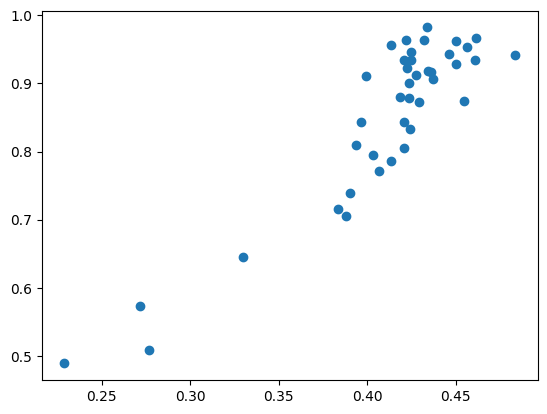

In [44]:
plt.scatter(x='diversity_ratio', y='English only', data=diverse_lang)

In [ ]:
diverse_lang.rename(columns={'English only': 'english_only', 'Language other than English': 'Language_other_than_English'}, inplace=True)
diverse_lang['english_only'] = diverse_lang['english_only'].astype(float)
diverse_lang['Language_other_than_English'] = diverse_lang['Language_other_than_English'].astype(float)

X = diverse_lang.iloc[:, 3:]
y = diverse_lang['diversity_ratio']
X = sm.add_constant(X)
# m = sm.OLS(y, X.astype(float))
m = smf.ols(formula = 'diversity_ratio ~ english_only + Language_other_than_English', data = diverse_lang)
# m = smf.ols(formula = 'diversity_ratio ~ english_only', data = diverse_lang)

r = m.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_ratio   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           5.60e-16
Time:                        04:19:18   Log-Likelihood:                 97.342
No. Observations:                  40   AIC:                            -190.7
Df Residuals:                      38   BIC:                            -187.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.1863      0.007     26.857      0.000       0.172       0.200
english_only                    0.2802      0.011     26.073      0.000       0.258       0.302
Language_other_than_English    -0.0939      0.017     -5.439      0.000      -0.129      -0.059
==============================================================================
Omnibus:                        1.260   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                1.089
Skew:                          -0.205   Prob(JB):                        0.580
Kurtosis:                       2.304   Cond. No.                     9.97e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.05e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
m = smf.ols(formula = 'diversity_ratio ~ english_only', data = diverse_lang)

r = m.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_ratio   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           5.60e-16
Time:                        04:19:25   Log-Likelihood:                 97.342
No. Observations:                  40   AIC:                            -190.7
Df Residuals:                      38   BIC:                            -187.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0923      0.024      3.844      0.000       0.044       0.141
english_only     0.3741      0.028     13.402      0.000       0.318       0.431
==============================================================================
Omnibus:                        1.260   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                1.089
Skew:                          -0.205   Prob(JB):                        0.580
Kurtosis:                       2.304   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
m = smf.ols(formula = 'diversity_ratio ~ Language_other_than_English', data = diverse_lang)

r = m.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_ratio   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           5.60e-16
Time:                        04:19:30   Log-Likelihood:                 97.342
No. Observations:                  40   AIC:                            -190.7
Df Residuals:                      38   BIC:                            -187.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.4664      0.005     86.616      0.000       0.456       0.477
Language_other_than_English    -0.3741      0.028    -13.402      0.000      -0.431      -0.318
==============================================================================
Omnibus:                        1.260   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                1.089
Skew:                          -0.205   Prob(JB):                        0.580
Kurtosis:                       2.304   Cond. No.                         8.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

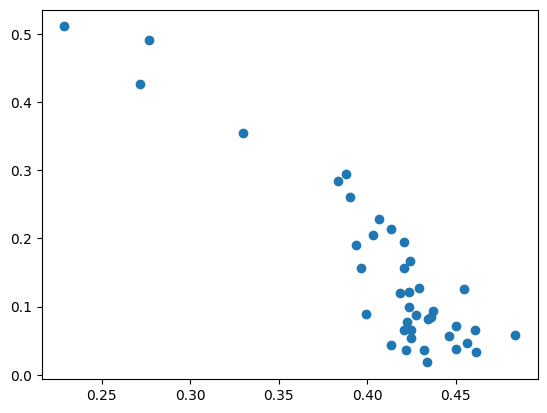

In [ ]:
diverse_lang = diverse_lang.iloc[:, 0:6]
diverse_lang['Speak English less than "very well"'] = diverse_lang['Speak English less than "very well"'].astype(float)
plt.scatter(x='diversity_ratio', y='Language other than English', data=diverse_lang)

# diverse_lang

fig, ax = plt.figshow()

In [ ]:
mini_ancestry.iloc[:, 1:-5]

,American,Arab,Czech,Danish,Dutch,English,French (except Basque),French Canadian,German,Greek,...,Scotch-Irish,Scottish,Slovak,Subsaharan African,Swedish,Swiss,Ukrainian,Welsh,West Indian (excluding Hispanic origin groups),Total households
County,,,,,,,,,,,,,,,,,,,,,
Washington,285061.0,39659.0,27570.0,61497.0,123131.0,868037.0,197049.0,44181.0,1152811.0,24978.0,...,78138.0,194784.0,6531.0,107128.0,203180.0,30910.0,64073.0,65396.0,16398.0,2979272.0
Adams County,409.0,42.0,22.0,40.0,141.0,1109.0,195.0,43.0,1844.0,0.0,...,72.0,164.0,0.0,5.0,190.0,16.0,17.0,36.0,0.0,6304.0
Asotin County,1291.0,0.0,11.0,153.0,301.0,3028.0,552.0,187.0,4517.0,7.0,...,251.0,404.0,0.0,53.0,513.0,60.0,0.0,121.0,0.0,9499.0
Benton County,9252.0,1385.0,737.0,2112.0,4675.0,29694.0,4937.0,956.0,35195.0,172.0,...,2010.0,5222.0,247.0,1638.0,4771.0,605.0,724.0,2593.0,127.0,75509.0
Chelan County,4521.0,121.0,350.0,473.0,1343.0,8555.0,1843.0,355.0,13510.0,190.0,...,690.0,2088.0,22.0,66.0,1889.0,263.0,91.0,597.0,0.0,30414.0
Clallam County,3564.0,190.0,215.0,516.0,1623.0,12220.0,2477.0,557.0,13774.0,96.0,...,1064.0,3367.0,84.0,123.0,2455.0,521.0,297.0,1083.0,130.0,34128.0
Clark County,21510.0,1976.0,1903.0,3958.0,8833.0,62773.0,13909.0,4012.0,83546.0,1987.0,...,5650.0,12966.0,310.0,3299.0,14510.0,2537.0,8985.0,4531.0,196.0,188863.0
Columbia County,258.0,0.0,0.0,59.0,123.0,602.0,107.0,18.0,756.0,0.0,...,38.0,98.0,0.0,0.0,52.0,35.0,4.0,9.0,0.0,1804.0
Cowlitz County,5205.0,124.0,197.0,914.0,2531.0,14287.0,3332.0,842.0,20085.0,93.0,...,1023.0,2722.0,26.0,301.0,2825.0,430.0,92.0,517.0,287.0,43167.0


In [ ]:
X = mini_ancestry.iloc[:, 1:-5]
y = mini_ancestry['internet_ratio']
X = sm.add_constant(X)
m = sm.OLS(y, X)
# m = smf.ols(formula = 'computer_ratio ~ English + Welsh + Danish + American + Arab', data = mini_ancestry)
r = m.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         internet_ratio   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                 -0.773
Method:                 Least Squares   F-statistic:                    0.3928
Date:                Wed, 06 Mar 2024   Prob (F-statistic):              0.977
Time:                        03:43:24   Log-Likelihood:                 81.013
No. Observations:                  40   AIC:                            -104.0
Df Residuals:                      11   BIC:                            -55.05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.8773      0.010     86.593      0.000       0.855       0.900
American                                       -1.519e-05   1.75e-05     -0.867      0.405   -5.38e-05    2.34e-05
Arab                                              -0.0002      0.000     -1.194      0.258      -0.001       0.000
Czech                                             -0.0002      0.000     -0.947      0.364      -0.001       0.000
Danish                                         -4.824e-05      0.000     -0.388      0.705      -0.000       0.000
Dutch                                           1.831e-05   8.75e-05      0.209      0.838      -0.000       0.000
English                                           1.6e-05    3.3e-05      0.485      0.637   -5.67e-05    8.87e-05
French (except Basque)                         -3.011e-05      0.000     -0.230      0.822      -0.000       0.000
French Canadian                                -4.163e-05      0.000     -0.208      0.839      -0.000       0.000
German                                         -3.196e-06   2.91e-05     -0.110      0.915   -6.73e-05     6.1e-05
Greek                                              0.0005      0.001      0.878      0.399      -0.001       0.002
Hungarian                                          0.0002      0.001      0.325      0.751      -0.001       0.001
Irish                                           1.344e-05   7.75e-05      0.174      0.865      -0.000       0.000
Italian                                         1.046e-05   7.99e-05      0.131      0.898      -0.000       0.000
Lithuanian                                         0.0002      0.000      0.533      0.604      -0.001       0.001
Norwegian                                      -1.029e-05   3.08e-05     -0.335      0.744    -7.8e-05    5.74e-05
Polish                                         -5.735e-05      0.000     -0.299      0.770      -0.000       0.000
Portuguese                                        -0.0002      0.000     -0.631      0.541      -0.001       0.000
Russian                                        -8.144e-05      0.000     -0.644      0.533      -0.000       0.000
Scotch-Irish                                    4.239e-05      0.000      0.341      0.739      -0.000       0.000
Scottish                                        5.872e-05      0.000      0.557      0.589      -0.000       0.000
Slovak                                         -7.204e-05      0.001     -0.105      0.918      -0.002       0.001
Subsaharan African                              6.313e-05   9.99e-05      0.632      0.540      -0.000       0.000
Swedish                                        -2.402e-05   5.16e-05     -0.466      0.650   

In [ ]:
detailed = pd.read_csv('data/DetailedAncestryB04006.csv')

detailed.set_index('Label (Grouping)', inplace=True)
detailed = detailed.transpose()
detailed['temp_index'] = detailed.index
regex_pattern = r"^[\w,\s]+\!\![\w,\s]+$"
detailed = detailed.loc[detailed['temp_index'].str.contains(regex_pattern)]
# detailed.insert(0, "County", "")       
# detailed.insert(1, "Ratio", "")

# for row in languages['temp_index']:
#     terms = row.split("!!")
#     terms[0] = terms[0].split(",")[0]
#     languages.loc[row, ['County']] = terms[0]
#     languages.loc[row, ['Ratio']] = terms[1]

# languages.rename_axis(None, axis=1, inplace=True)
# languages.set_index(['County', 'Ratio'], inplace=True)
detailed.drop(columns=['temp_index'], inplace=True, axis=1)
detailed.dropna(inplace=True)
detailed.columns = [name.strip() for name in detailed.columns]
detailed = detailed.apply(lambda x: x.str.replace(',','').astype(float))
detailed.iloc[0, 1:]
# detailed

Afghan                             5081.0
Albanian                           1133.0
Alsatian                            254.0
American                         308168.0
Arab:                             41831.0
                                  ...    
West Indian                        2603.0
Other West Indian                    56.0
Yugoslavian                        8821.0
Other groups                    2352307.0
Unclassified or not reported    1754960.0
Name: Washington!!Estimate, Length: 108, dtype: float64